# KNN Classisfication - Heart Disease

## Introduction
___

**Heart diseases**, which are often caused by the narrowing of blood vessels, are the most common cause of death globally (CDC 2022). Recognizing the primary risk factors for heart disease is crucial for reducing mortality risks due to a heart disease. A research conducted by Hajar in 2017 highlights several key risk factors, including hypertension (high blood pressure), hypercholesterolemia (high cholesterol levels), and lack of physical activity. Therefore, this analysis aims to explore this question: **Can we predict a heart disease diagnosis based on age, serum cholesterol, resting blood pressure, maximum heart rate, and exercised-induced ST Depression, using KNN Classification?**

The *Heart Disease* dataset (1988) cotains patients' personal and health information such as age and cholesterol, incuding the metioned predictors in the above question. The dataset incudes the patients' heart disease diagnoses, which is categorical as 0 (indicating absence of heart disease) and 1 (indicating presence of heart disease). Here, the diagnosis for heart disease indicates >50% narrowing in any major blood vessel. The data includes some information which we do not need such as sex and thal, and it is provided from four different location in four different files. So it must be tidyed and combined before it is analyzed.
ust be combined before it is analyzed.

In [1]:
# Install these libraries before continuing
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Reading data from web (stored in github repo)
cleveland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.cleveland.csv"
hungarian_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.hungarian.csv"
switzerland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.switzerland.csv"
beach_url <-  "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.va.csv"

names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thanl", "num")

cleveland <- read_csv(cleveland_url, col_names = names)
hungarian <- read_csv(hungarian_url, col_names = names)
switzerland <- read_csv(switzerland_url, col_names = names)
beach <- read_csv(beach_url, col_names = names)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thanl
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thanl
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thanl
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to r

In [3]:
# Changing all columns to doubles to be able to combine the 4 dataframes

cleveland <- mutate_all(cleveland, as.double)
hungarian <- mutate_all(hungarian, as.double)
switzerland <- mutate_all(switzerland, as.double)
beach <- mutate_all(beach, as.double)

heart_data_combined <- bind_rows(cleveland, hungarian, switzerland, beach)
heart_data_combined

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = .Primitive("as.double")(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see 

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1


In [4]:
clean_heart <- heart_data_combined |>
                mutate(num = ifelse(num %in% 1:4, 1, num)) |> # Correcting scaling of num
                filter(chol != 0) |> # There is one incorrect point where chol = 0
                mutate(num = as_factor(num)) |>
                select(age, chol, trestbps, thalach, oldpeak, num) |>
                filter(!is.na(age), !is.na(chol), !is.na(trestbps), !is.na(thalach), !is.na(oldpeak)) # Remove NAs

arrange(clean_heart, age)

age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,132,130,185,0,0
29,204,130,202,0,0
29,243,120,160,0,0
⋮,⋮,⋮,⋮,⋮,⋮
76,197,140,116,1.1,0
77,304,125,162,0.0,1
77,171,124,110,2.0,1


In [5]:
# Split data into training (80%) and testing (20%) data
set.seed(1234)                    

heart_split <- initial_split(clean_heart, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

arrange(heart_train, age)
arrange(heart_test, age)

age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,132,130,185,0,0
29,204,130,202,0,0
29,243,120,160,0,0
⋮,⋮,⋮,⋮,⋮,⋮
76,197,140,116,1.1,0
77,304,125,162,0.0,1
77,171,124,110,2.0,1


age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
30,237,170,170,0,0
31,219,100,150,0,0
32,225,110,184,0,0
⋮,⋮,⋮,⋮,⋮,⋮
68,193,144,141,3.4,1
69,216,122,84,0.0,1
70,192,170,129,3.0,1


### Preliminary Analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


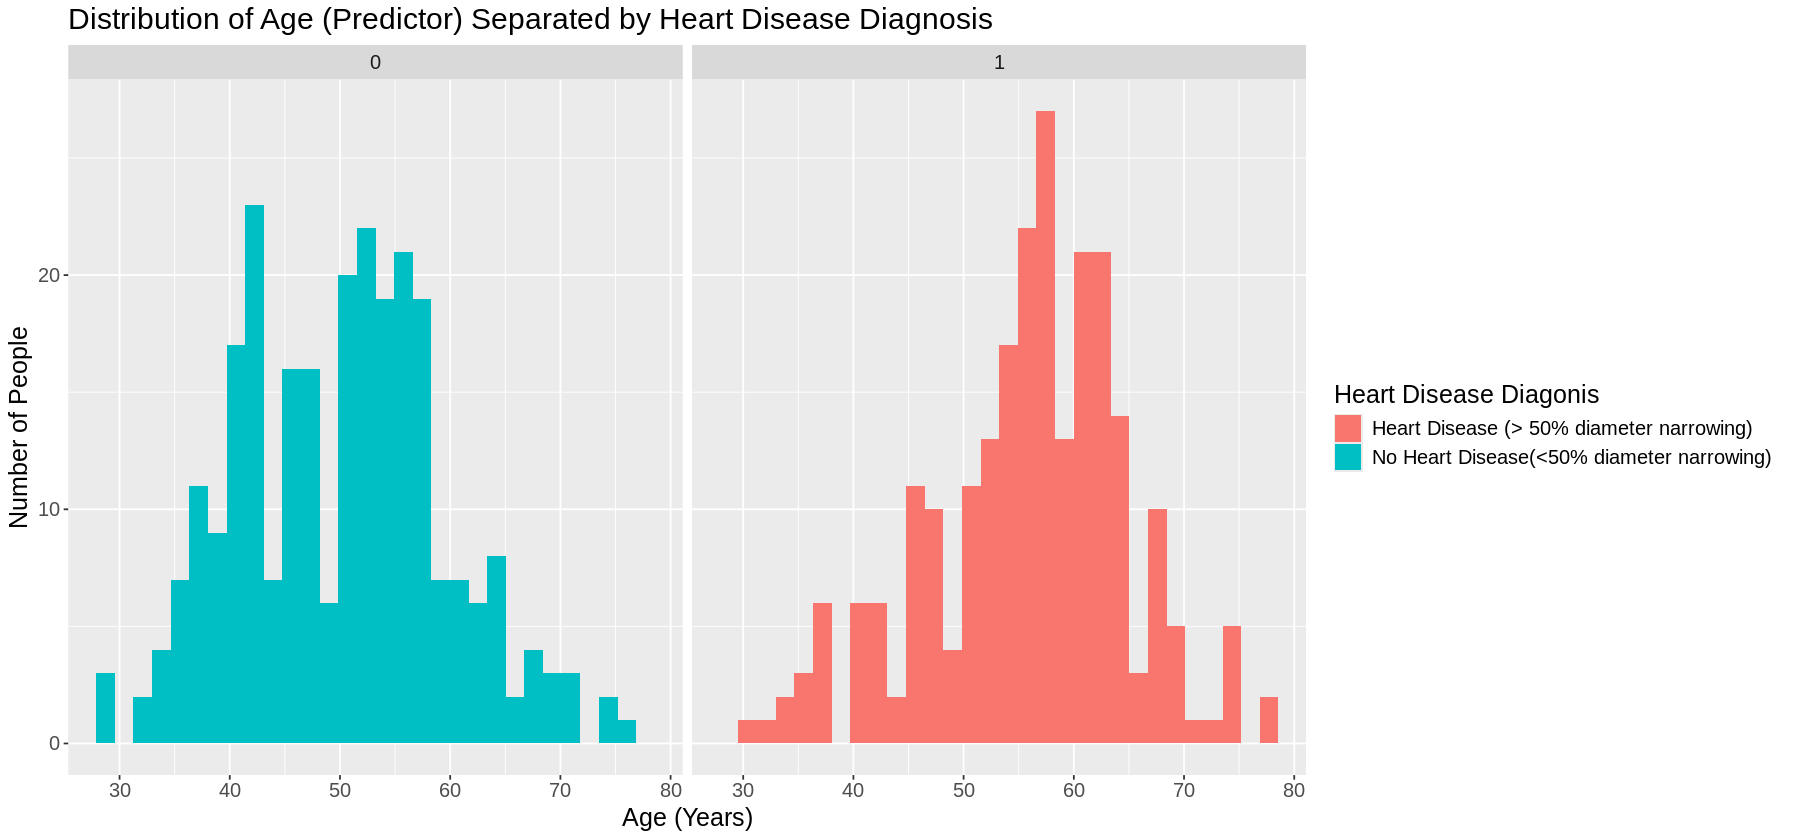

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


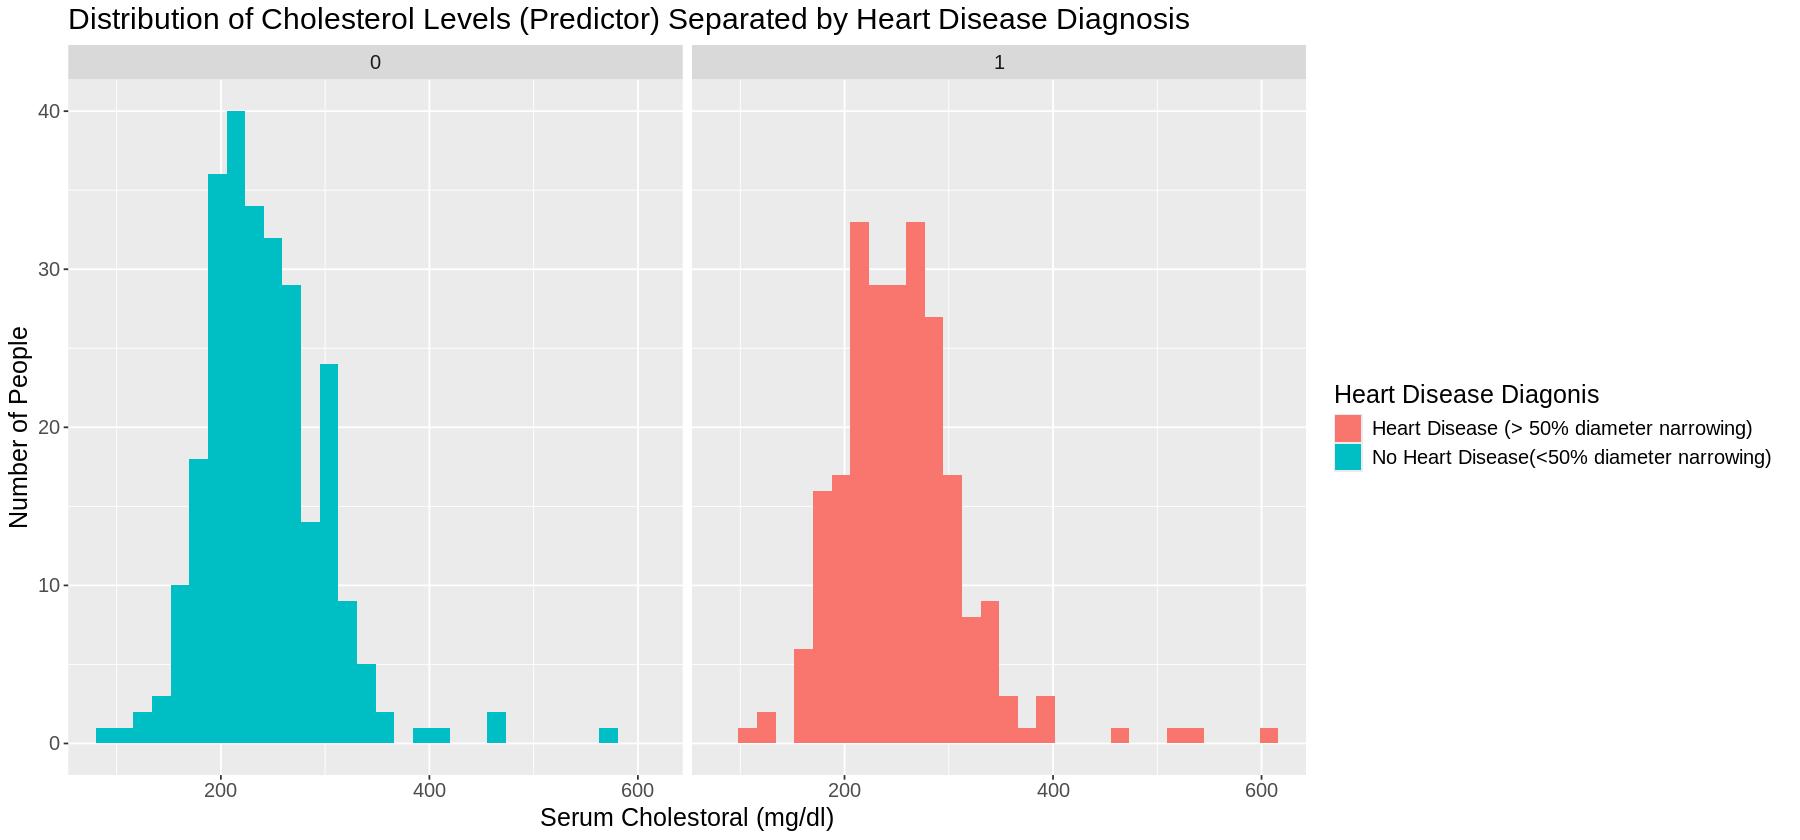

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


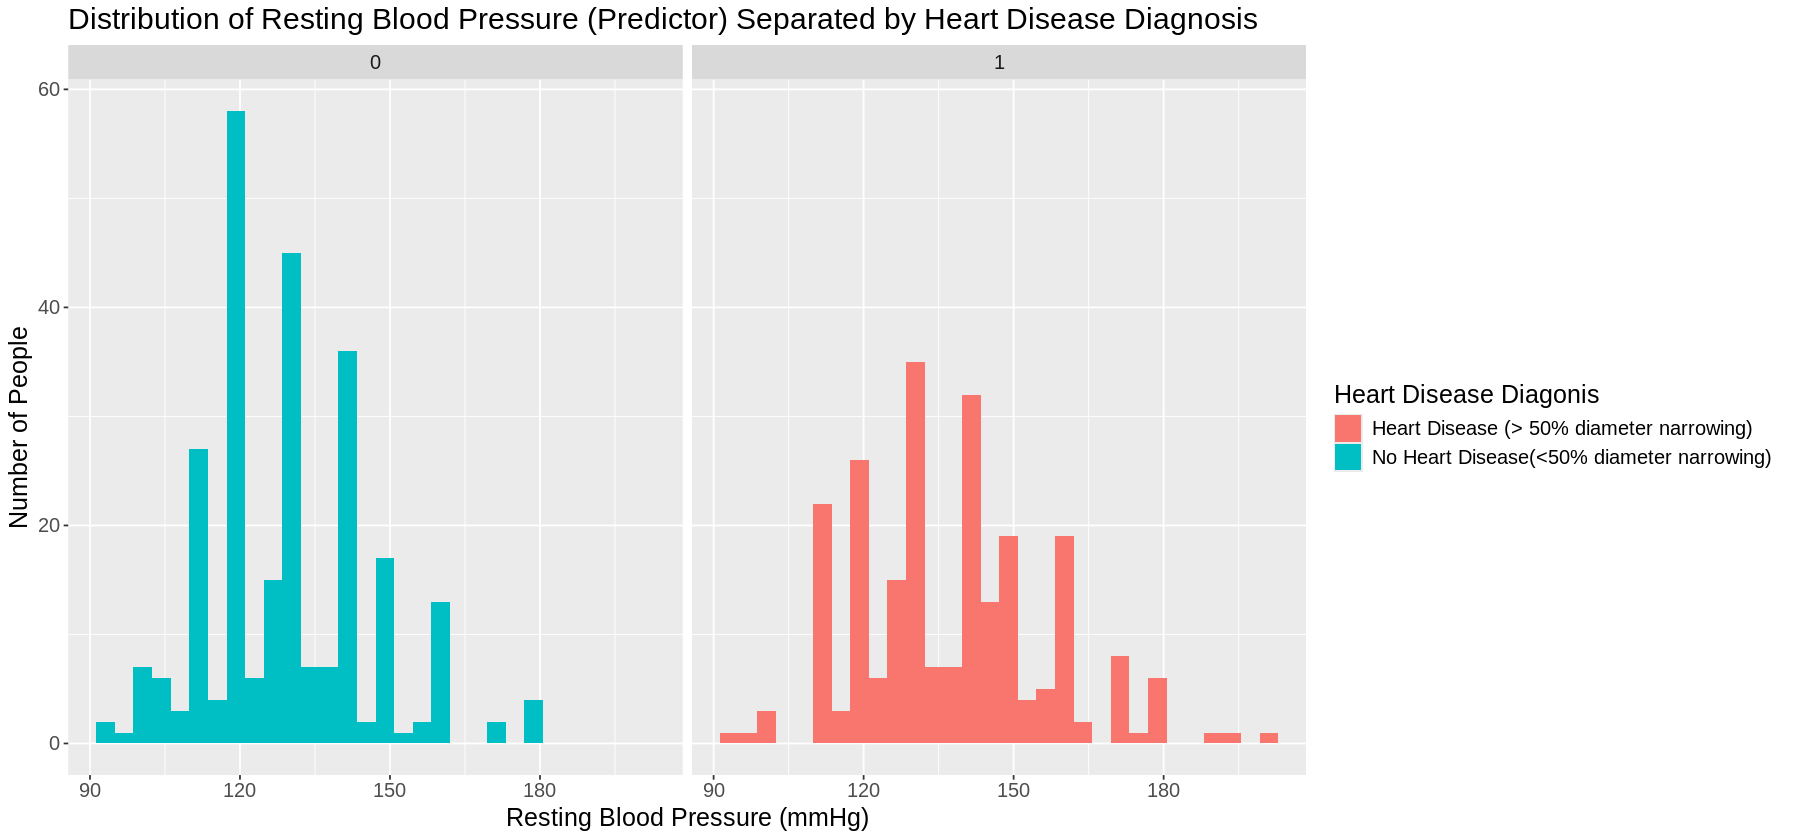

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


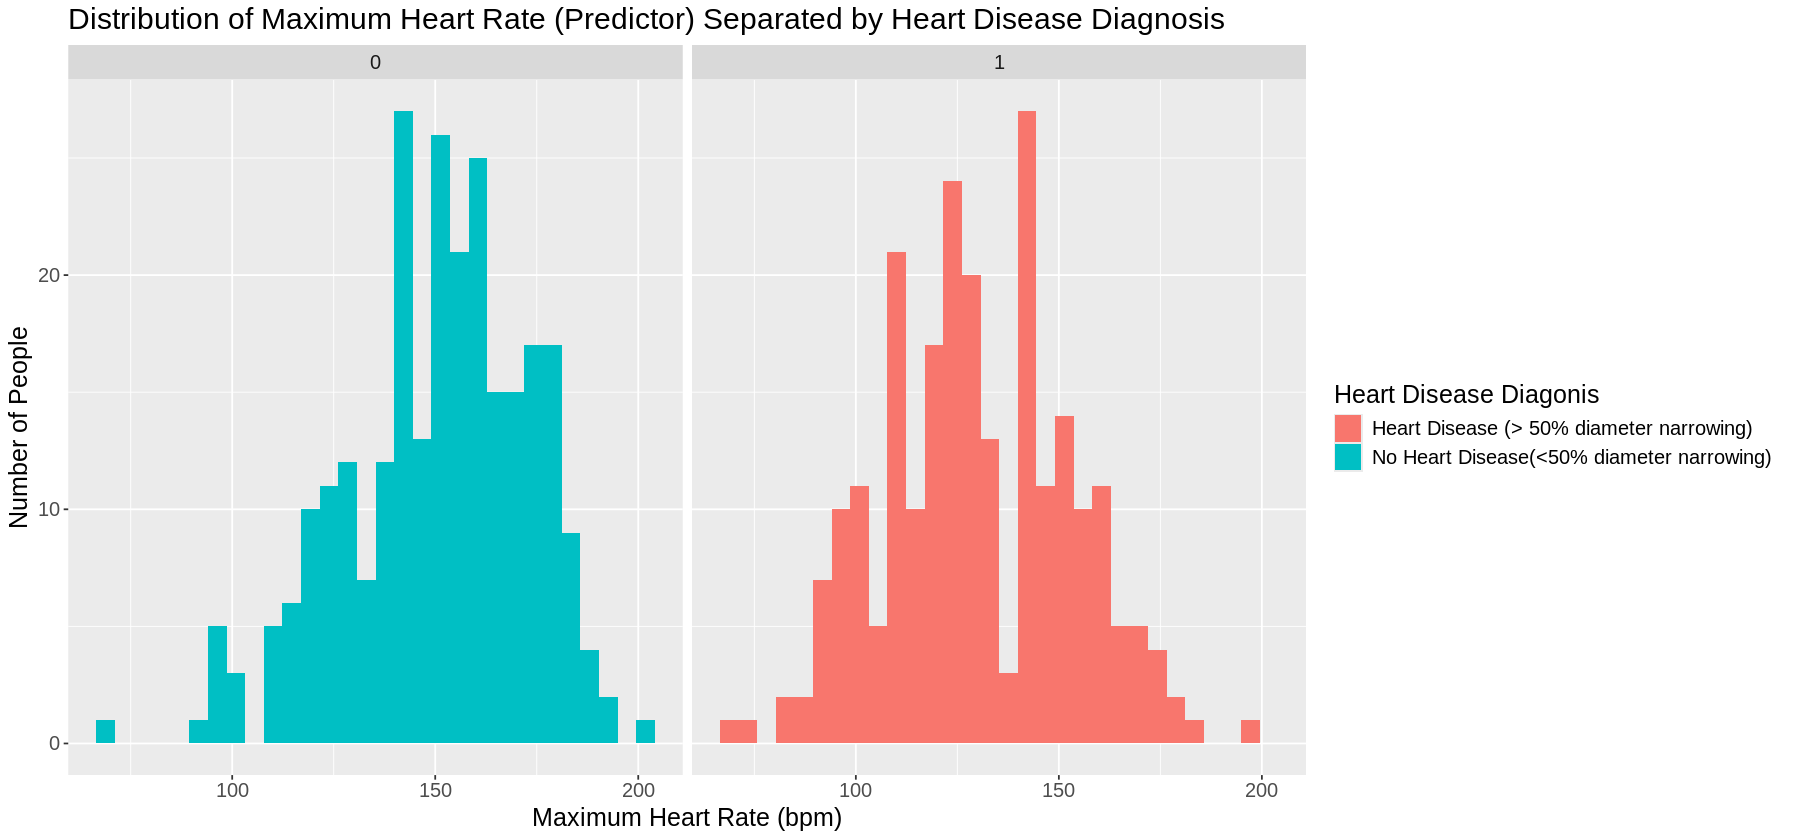

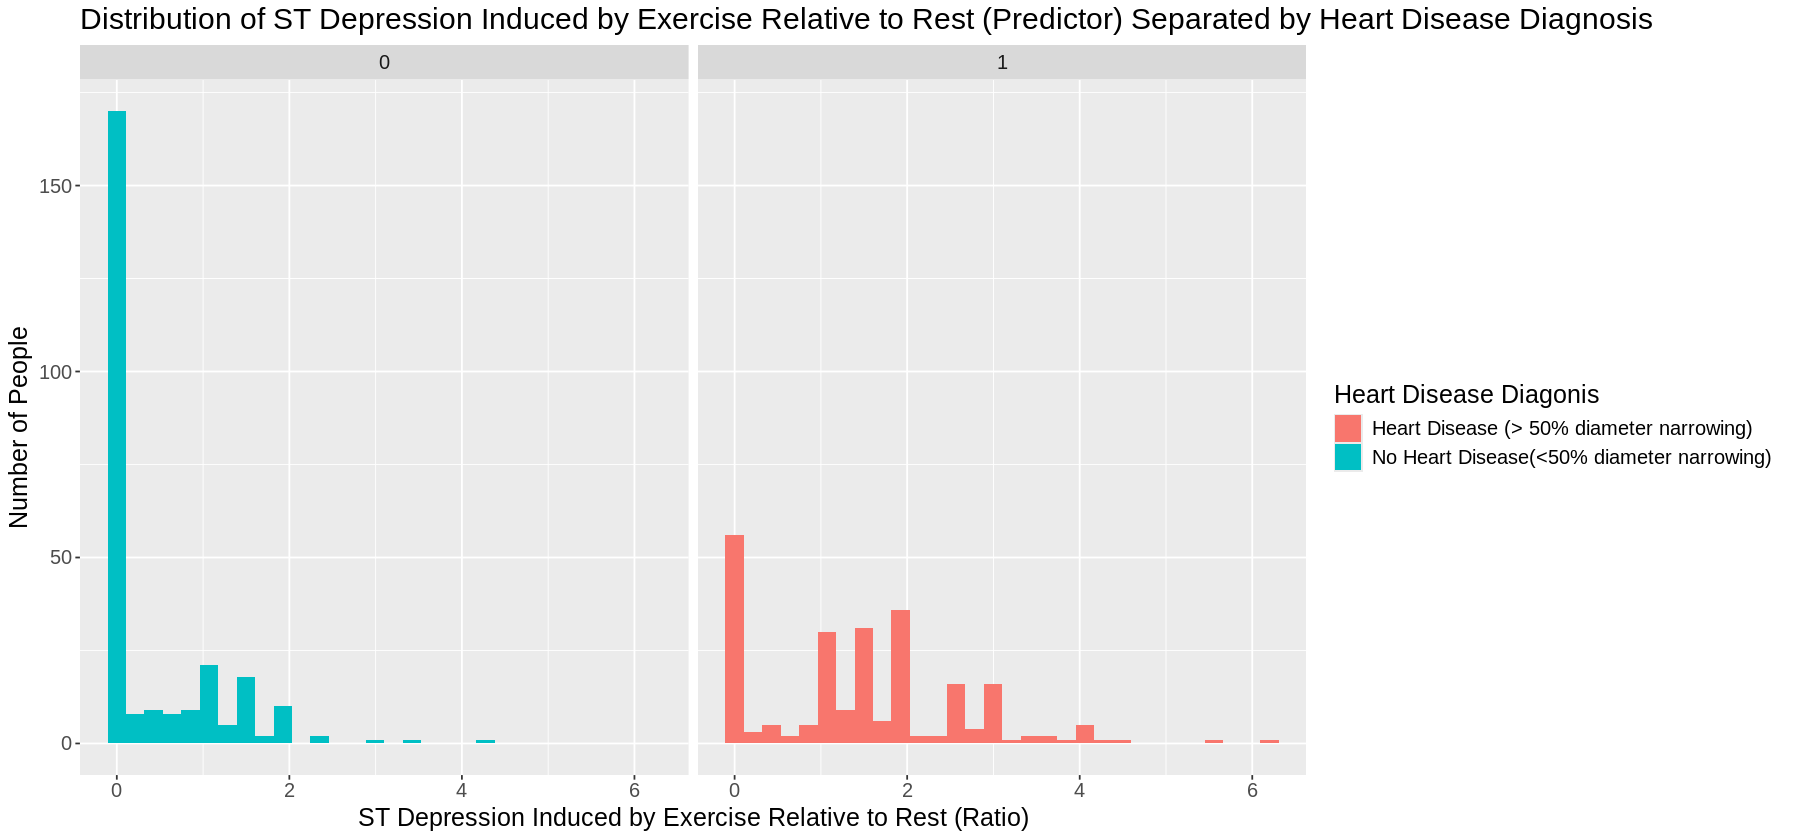

In [6]:
# Plots visualizing distribution of each variable, separated by diagnosis of heart disease
options(repr.plot.width = 15) # Alter to fit screen

# Renaming num (plots only to make the legend clearer
heart_train_renamed_num <- heart_train |>
                            mutate(diagnosis = case_when(
                                num == 0 ~ "No Heart Disease(<50% diameter narrowing)",
                                num == 1 ~ "Heart Disease (> 50% diameter narrowing)"
                            ))

y_lab = "Number of People"
leg_lab = "Heart Disease Diagonis"
text_size = 15

plot_age <- ggplot(heart_train_renamed_num, aes(x = age)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Age (Years)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Age (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_chol <- ggplot(heart_train_renamed_num, aes(x = chol)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Serum Cholestoral (mg/dl)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Cholesterol Levels (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_trestbps <- ggplot(heart_train_renamed_num, aes(x = trestbps)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Resting Blood Pressure (mmHg)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Resting Blood Pressure (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_thalach <- ggplot(heart_train_renamed_num, aes(x = thalach)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Maximum Heart Rate (bpm)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Maximum Heart Rate (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_oldpeak <- ggplot(heart_train_renamed_num, aes(x = oldpeak)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "ST Depression Induced by Exercise Relative to Rest (Ratio)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    theme(text = element_text(size = text_size)) +
    ggtitle("Distribution of ST Depression Induced by Exercise Relative to Rest (Predictor) Separated by Heart Disease Diagnosis") 

plot_age
plot_chol
plot_trestbps
plot_thalach
plot_oldpeak

### KNN Classification

In [7]:
# Recipe (standardization)
set.seed(1234)

heart_recipe <- recipe(num ~ ., data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Define model specification - tune neighbors using 5-fold cross validation
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
vals <- tibble(neighbors = seq(from = 1, to = 20))

heart_accuracy <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_tune) |>
    tune_grid(resamples = heart_vfold, grid = vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    arrange(neighbors)

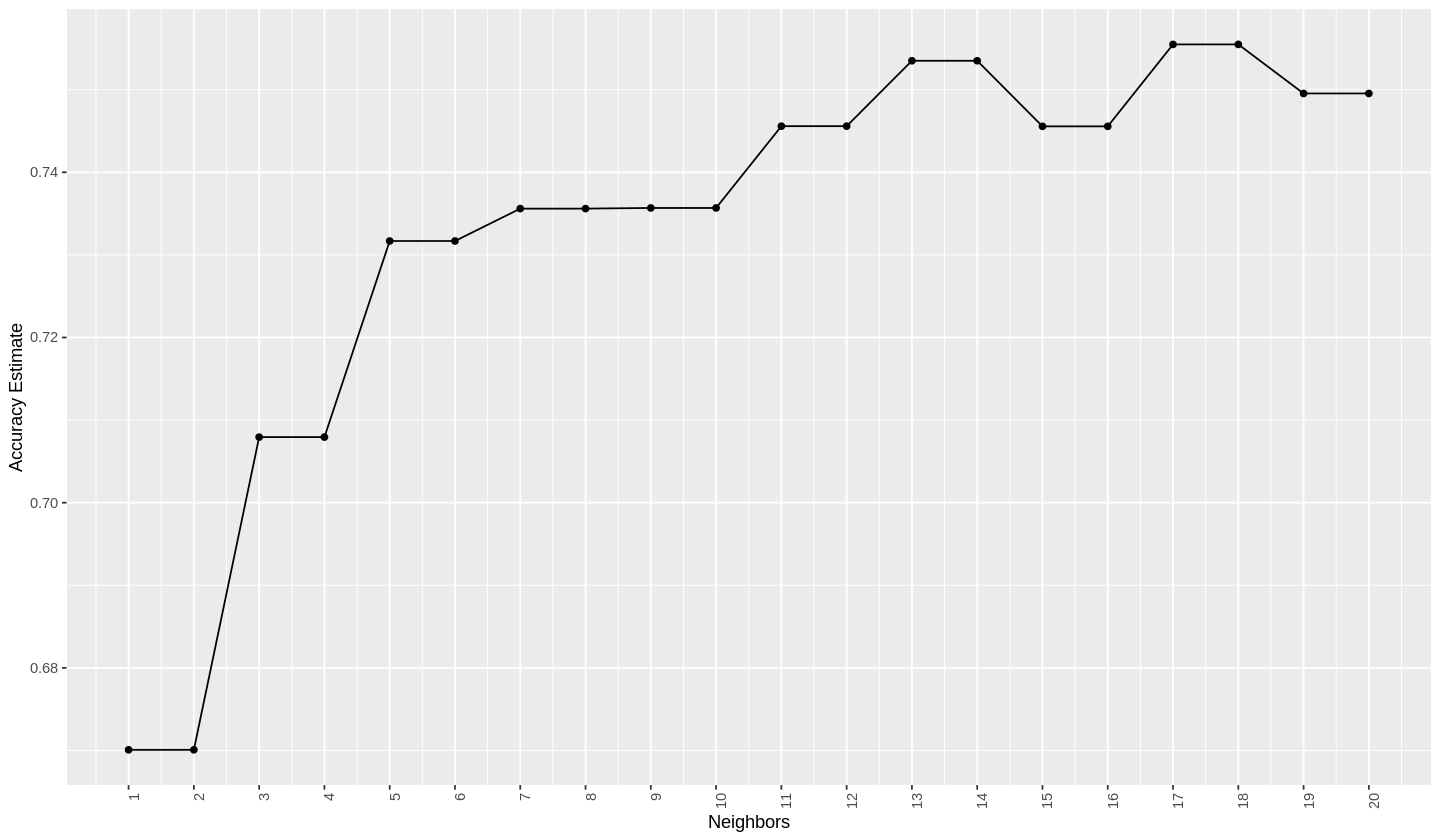

In [8]:
# Generate graph of accuracy
options(repr.plot.width = 12)
k_accuracies <- ggplot(heart_accuracy, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 100, by = 1)) +
       theme(axis.text.x = element_text(angle = 90, hjust = 1))

k_accuracies

In [9]:
heart_predictors <- heart_train |>
                    select(age, chol, trestbps, thalach, oldpeak)
        
heart_means <- map_df(heart_predictors, mean)
heart_means

age,chol,trestbps,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.82107,248.1113,132.9304,140.5964,0.9151093


In [10]:
# Maximum
heart_max <- heart_predictors |>
                    map_df(max)
heart_max

age,chol,trestbps,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
77,603,200,202,6.2


In [11]:
# Minimum
heart_min <- heart_predictors |>
                    map_df(min)
heart_min

age,chol,trestbps,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,85,92,69,0


In [12]:
heart_obs <- heart_train |>
                group_by(num) |>
                summarize(num_count = n())

heart_obs

num,num_count
<fct>,<int>
0,265
1,238


In [13]:
# Determine best k

best_k <- heart_accuracy |>
    arrange(-mean) |>
    slice(1) |>
    select(neighbors) |>
    pull()

best_k

best_train_accuracy <- heart_accuracy |>
    summarize(accuracy = max(mean)) |>
    pull()

percent(best_train_accuracy)

[1] 17

[1] "76%"

In [14]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_resample_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_train)

heart_resample_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(17L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2564612
Best kernel: rectangular
Best k: 17

In [15]:
# Prediction on the testing data
heart_test_predict = predict(heart_resample_fit, heart_test)|>
    bind_cols(heart_test)

# heart_train_resample_predict
heart_test_accuracy <- metrics(data = heart_test_predict, truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy")|>
    pull()

heart_test_accuracy

[1] 0.6923077

In [16]:
# Cross Validation Plot
confusion <- heart_test_predict |>
             conf_mat(truth = num, estimate = .pred_class)

confusion

precision <- heart_test_predict |>
            precision(truth = num, estimate = .pred_class, event_level = "first")

recall <- heart_test_predict |>
            recall(truth = num, estimate = .pred_class, event_level = "first")

precision
recall

          Truth
Prediction  0  1
         0 75 38
         1 14 42

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6637168


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8426966


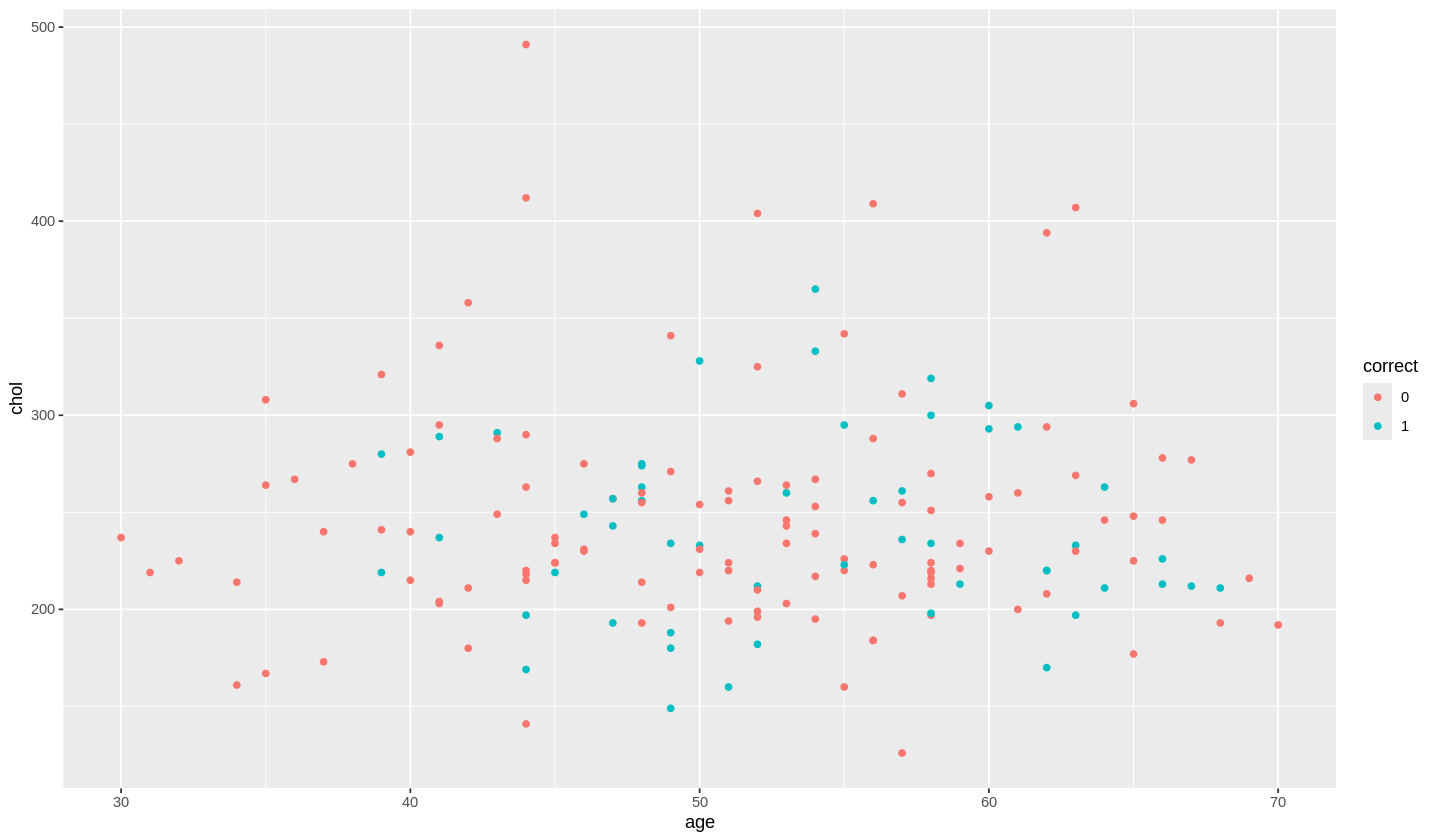

In [17]:
## Testing additional ideas about how to plot!
library(class)
heart_correct <- heart_test_predict |>
                    mutate(correct = as.integer(num) - as.integer(.pred_class)) |>
                    mutate(correct = as.factor(ifelse(correct == 0, 0, 1)))

heart_correct_plot <- heart_correct |>
    ggplot(aes(x = age, y = chol)) +
    geom_point(aes(color = correct))

heart_correct_plot

## Citations
Hajar, R. (2017). Risk factors for coronary artery disease: Historical perspectives. Heart Views, 18(3), 109–109. https://doi.org/10.4103/heartviews.heartviews_106_17


Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. Heart Disease UCI Machine Learning Repository [Data set]. https://doi.org/10.24432/C52P4X

Jousilahti, P., Vartiainen, E., Tuomilehto, J., Puska, P. Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease. (1999). Circulation, 99, 1165-1172. https://doi.org/10.1161/01.CIR.99.9.1165

Bobbio, M., Detrano, R., Schmid, J., Janosi, A., Righetti, A., Steinbrunn, W., Guppy, K., Abi-Mansour, P., Deckers, J., Colombo, A., Lehmann, K., Olson, H. (1992). Exercise-induced ST depression and ST/heart rate index to predict triple-vessel or left main coronary disease: A multicenter analysis. Journal of American College of Cardiology, 19(1), 11-18. https://doi.org/10.1016/0735-1097(92)90044-N

Heart Disease and Stroke. (2022 8 September). CDC. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=The%20Nation's%20Risk%20Factors%20and,unhealthy%20diet%2C%20and%20physical%20inactivity.

Citations and in-text citations excluded from word coun